In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:>

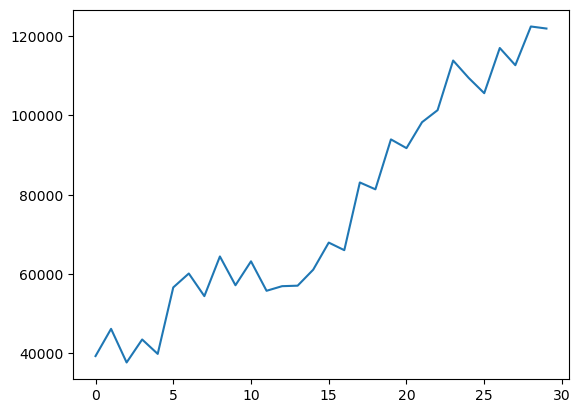

In [28]:
df.Salary.plot.line()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

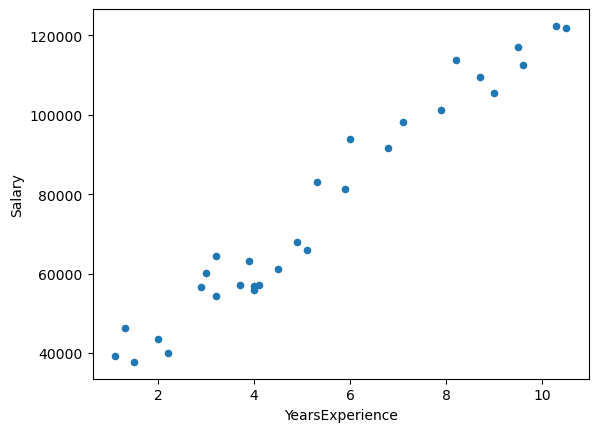

In [29]:
df.plot.scatter(x='YearsExperience',y='Salary')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

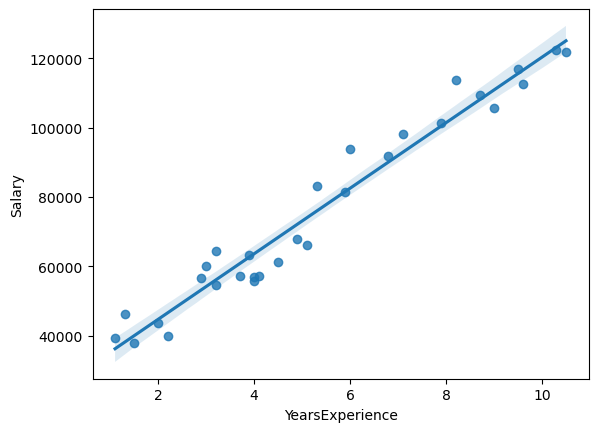

In [31]:
sns.regplot(x='YearsExperience',y='Salary', data=df)

In [20]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:ylabel='YearsExperience'>

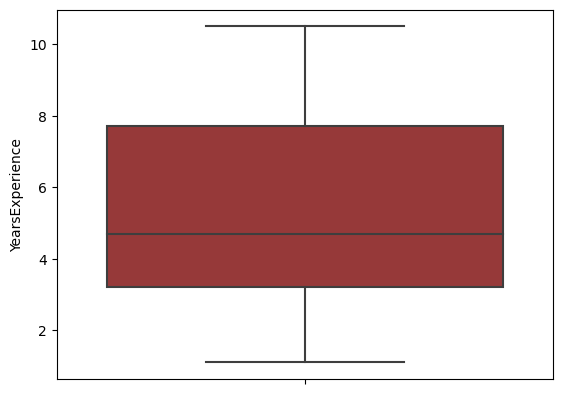

In [35]:
sns.boxplot(y=df['YearsExperience'],color='brown')

<AxesSubplot:ylabel='Salary'>

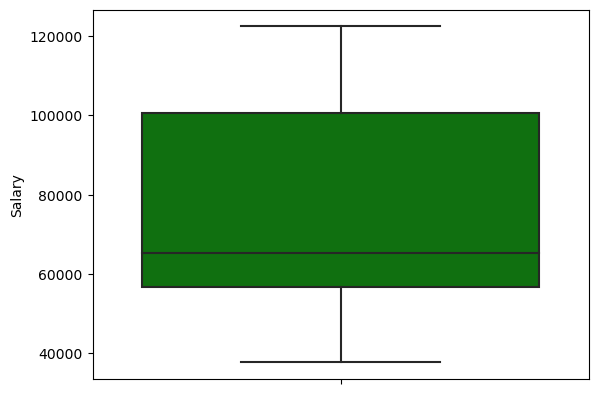

In [33]:
sns.boxplot(y=df['Salary'],color='green')

In [36]:
X=df['YearsExperience']
Y=df['Salary']

# Pearson_Correlation_Coefficient

In [37]:
sum_products=0
def user_pearsonr(x, y):
    n = len(x)

    # Calculate the mean of x and y
    x_mean = sum(x) / n
    y_mean = sum(y) / n

    # Calculate the sum of squares for x and y
    x_sum_squares = sum((x_i - x_mean) ** 2 for x_i in x)
    y_sum_squares = sum((y_i - y_mean) ** 2 for y_i in y)

    # Calculate the sum of products for x and y
    sum_products = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    
    # Calculate the Pearson correlation coefficient
    r = sum_products / ((x_sum_squares * y_sum_squares) ** 0.5)

    return r,x_sum_squares,y_sum_squares
r,d1,d2=user_pearsonr(X, Y)   
print('R value',r)

R value 0.9782416184887598


# Slope

In [38]:
Std_y=np.sqrt(d2/(Y.count()-1))
Std_x=np.sqrt(d1/(X.count()-1))
Slope=r*(Std_y/Std_x)
print("Slope Value ",Slope)

Slope Value  9449.962321455076


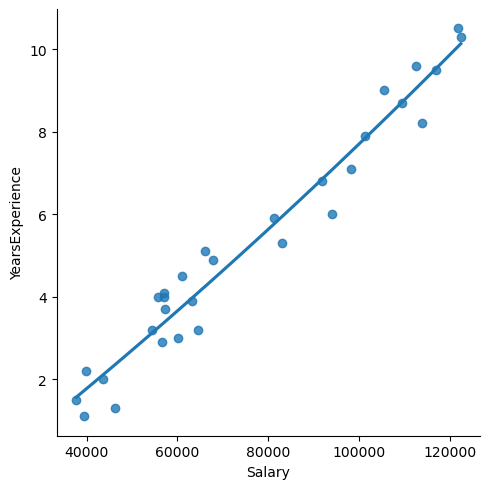

In [62]:
sns.lmplot(x ="Salary", y ="YearsExperience", data = df, order = 2, ci = None)

# Y-intercept

In [39]:
y_intercept=Y.mean()-Slope*X.mean()
y_intercept

25792.200198668696

# Predection

In [40]:
#Considering x as 7.5
x_new=7.5
y_pred=y_intercept+(Slope*x_new)
y_pred

96666.91760958177

In [43]:
def simple_Linear_Regression(x,y):
    n = len(x)

    # Calculate the mean of x and y
    x_mean = sum(x) / n
    y_mean = sum(y) / n

    # Calculate the sum of squares for x and y
    x_sum_squares = sum((x_i - x_mean) ** 2 for x_i in x)
    y_sum_squares = sum((y_i - y_mean) ** 2 for y_i in y)

    # Calculate the sum of products for x and y
    sum_products = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    
    # Calculate the Pearson correlation coefficient
    r = sum_products / ((x_sum_squares * y_sum_squares) ** 0.5)

    print('R Value',r)
    
    Std_y=np.sqrt(d2/(Y.count()-1))
    Std_x=np.sqrt(d1/(X.count()-1))
    Slope=r*(Std_y/Std_x)
    
    print("Slope Value ",Slope)
    
    y_intercept=Y.mean()-Slope*X.mean()
    y_intercept
    
    #x_new=7.5
    x_new=float(input("Enter the year of exprience "))
    y_pred=y_intercept+(Slope*x_new)
    y_pred
    print('Expected Salary :',int(y_pred))

In [44]:
simple_Linear_Regression(X,Y)

R Value 0.9782416184887598
Slope Value  9449.962321455076
Enter the year of exprience 3.2
Expected Salary : 56032


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train = y_train.values
y_test = y_test.values

(22,) (22,)
(8,) (8,)


In [46]:
def simple_Linear_Regression(x,y,x_test):
    n = len(x)

    # Calculate the mean of x and y
    x_mean = sum(x) / n
    y_mean = sum(y) / n

    # Calculate the sum of squares for x and y
    x_sum_squares = sum((x_i - x_mean) ** 2 for x_i in x)
    y_sum_squares = sum((y_i - y_mean) ** 2 for y_i in y)

    # Calculate the sum of products for x and y
    sum_products = sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y))
    
    # Calculate the Pearson correlation coefficient
    r = sum_products / ((x_sum_squares * y_sum_squares) ** 0.5)

    print('R Value',r)
    
    Std_y=np.sqrt(d2/(Y.count()-1))
    Std_x=np.sqrt(d1/(X.count()-1))
    Slope=r*(Std_y/Std_x)
    
    print("Slope Value ",Slope)
    
    y_intercept=Y.mean()-Slope*X.mean()
    y_intercept
    
    #x_new=7.5
    #x_new=float(input("Enter the year of exprience "))
    y_pred=[]
    for x_new in x_test:
        y_pred.append(int(y_intercept+(Slope*x_new)))
   
    return y_pred

In [47]:
y_pred=simple_Linear_Regression(X_train,y_train,X_test)
print(y_pred)

R Value 0.9692994133384959
Slope Value  9363.579264198463
[40296, 122696, 64641, 62769, 115205, 107714, 116141, 63705]


# Mean Absolute Error(MAE)

In [48]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.])

In [49]:
def MAE(y_test,y_pred):
    n=len(y_test)
    sum_of_diff=0
    for i in range(n):
        sum_of_diff+=abs(y_test[i]-y_pred[i])
    
    return sum_of_diff/n

In [50]:
mae=MAE(y_test,y_pred)
mae

3222.125

# Mean Squared Error(MSE)

In [51]:
def MSE(y_test,y_pred):
    n=len(y_test)
    sum_of_diff=0
    for i in range(n):
        sum_of_diff+=(abs(y_test[i]-y_pred[i]))**2
    
    return sum_of_diff/n

In [52]:
mse=MSE(y_test,y_pred)
mse

18120399.125

# Root Mean Squared Error (RMSE)

In [53]:
def RMSE(y_test,y_pred):
    n=len(y_test)
    sum_of_diff=0
    for i in range(n):
        sum_of_diff+=(abs(y_test[i]-y_pred[i]))**2
    
    return np.sqrt(sum_of_diff/n)

In [54]:
rmse=RMSE(y_test,y_pred)
rmse

4256.806211821252

# Relative Root Mean Squared Error (RRMSE)

In [55]:
def RRMSE(y_test,y_pred):
    n=len(y_test)
    sum_of_diff=0
    sum_of_ypred=0
    for i in range(n):
        sum_of_diff+=(abs(y_test[i]-y_pred[i]))**2
        sum_of_ypred+=(y_pred[i]**2)
    
    return np.sqrt((sum_of_diff/n)/sum_of_ypred) 

In [56]:
rrmse=RRMSE(y_test,y_pred)
rrmse

0.016418782904816038

# R Squared (R2)

In [57]:
def r2(y_test,y_pred): 
    n=len(y_test)
    mean=y_test.mean()
    sum_of_sqmean=0
    sum_of_sqerror=0
    for i in range(n):
        sum_of_sqmean+=(y_test[i]-mean)**2
        sum_of_sqerror+=(abs(y_test[i]-y_pred[i]))**2
    return (1-(sum_of_sqerror/sum_of_sqmean))*100


In [58]:
r_sq= r2(y_test,y_pred)
r_sq

98.21454669188093

# Adjusted R Squared 

In [59]:
def adj_r2(y_test,y_pred): 
    n=len(y_test)
    mean=y_test.mean()
    sum_of_sqmean=0
    sum_of_sqerror=0
    for i in range(n):
        sum_of_sqmean+=(y_test[i]-mean)**2
        sum_of_sqerror+=(abs(y_test[i]-y_pred[i]))**2
    r2=(1-(sum_of_sqerror/sum_of_sqmean))
    #p value is number of columns(i.e no. of predictors)
    ytest=pd.DataFrame(y_test)
    p=ytest.shape[1]
    adjr2=1-((1-r2)*(n-1)/(n-p-1))
    return adjr2

In [60]:
adjr2=adj_r2(y_test,y_pred)
adjr2

0.9791697114052774